In [2]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [6]:
# Define Symbols Using Sympy

t, g, m1, m2, m3, L, D, L3 = smp.symbols('t g m1 m2 m3 L D L3')

In [7]:
# Define The Functions of Time

theta, r, phi = smp.symbols(r'\theta, r, \phi', cls=smp.Function)

In [8]:
# Explicitly Write Them as Functions of Time

theta = theta(t)
r = r(t)
phi = phi(t)

In [9]:
# Define Derivatives and Second Derivatives

theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
r_d = smp.diff(r, t)
r_dd = smp.diff(r_d, t)
phi_d = smp.diff(phi, t)
phi_dd = smp.diff(phi_d, t)

In [10]:
x1 = r*smp.sin(theta)
z1 = -r*smp.cos(theta)
x2 = -D
z2 = -(L-D-r)
x3 = r*smp.sin(theta) + L3*smp.sin(phi)
z3 = -r*smp.cos(theta) - L3*smp.cos(phi)

In [11]:
# Find Kinetic and Potential Energy

T1 = 0.5*m1*((smp.diff(x1, t))**2 + (smp.diff(z1, t))**2)
T2 = 0.5*m2*((smp.diff(x2, t))**2 + (smp.diff(z2, t))**2)
T3 = 0.5*m3*((smp.diff(x3, t))**2 + (smp.diff(z3, t))**2)
T = T1+T2+T3

U1 = m1*g*z1
U2 = m2*g*z2
U3 = m3*g*z3
U = U1+U2+U3

Lag = T-U

In [12]:
Lag

g*m1*r(t)*cos(\theta(t)) - g*m2*(D - L + r(t)) - g*m3*(-L3*cos(\phi(t)) - r(t)*cos(\theta(t))) + 0.5*m1*((r(t)*sin(\theta(t))*Derivative(\theta(t), t) - cos(\theta(t))*Derivative(r(t), t))**2 + (r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))**2) + 0.5*m2*Derivative(r(t), t)**2 + 0.5*m3*((L3*sin(\phi(t))*Derivative(\phi(t), t) + r(t)*sin(\theta(t))*Derivative(\theta(t), t) - cos(\theta(t))*Derivative(r(t), t))**2 + (L3*cos(\phi(t))*Derivative(\phi(t), t) + r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))**2)

In [13]:
# Get EL Equations

EL1 = smp.diff(smp.diff(Lag, r_d), t).simplify() - smp.diff(Lag, r).simplify()
EL2 = smp.diff(smp.diff(Lag, theta_d), t).simplify() - smp.diff(Lag, theta).simplify()
EL3 = smp.diff(smp.diff(Lag, phi_d), t).simplify() - smp.diff(Lag, phi).simplify()

In [14]:
EL1

-1.0*L3*m3*sin(\phi(t) - \theta(t))*Derivative(\phi(t), (t, 2)) - 1.0*L3*m3*cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2 - g*m1*cos(\theta(t)) + g*m2 - g*m3*cos(\theta(t)) - m1*r(t)*Derivative(\theta(t), t)**2 + 1.0*m1*Derivative(r(t), (t, 2)) + 1.0*m2*Derivative(r(t), (t, 2)) - m3*r(t)*Derivative(\theta(t), t)**2 + 1.0*m3*Derivative(r(t), (t, 2))

In [15]:
EL2

-L3*m3*r(t)*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2 + L3*m3*r(t)*cos(\phi(t) - \theta(t))*Derivative(\phi(t), (t, 2)) + 1.0*g*m1*r(t)*sin(\theta(t)) + 1.0*g*m3*r(t)*sin(\theta(t)) + m1*r(t)**2*Derivative(\theta(t), (t, 2)) + 2*m1*r(t)*Derivative(\theta(t), t)*Derivative(r(t), t) + m3*r(t)**2*Derivative(\theta(t), (t, 2)) + 2*m3*r(t)*Derivative(\theta(t), t)*Derivative(r(t), t)

In [16]:
EL3

L3*m3*(g*sin(\phi(t)) + (r(t)*sin(\phi(t) - \theta(t))*Derivative(\theta(t), t) + cos(\phi(t) - \theta(t))*Derivative(r(t), t))*Derivative(\phi(t), t)) + 1.0*L3*m3*(L3*Derivative(\phi(t), (t, 2)) - r(t)*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) + r(t)*sin(\phi(t) - \theta(t))*Derivative(\theta(t), t)**2 + r(t)*cos(\phi(t) - \theta(t))*Derivative(\theta(t), (t, 2)) - sin(\phi(t) - \theta(t))*Derivative(r(t), (t, 2)) - cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(r(t), t) + 2*cos(\phi(t) - \theta(t))*Derivative(\theta(t), t)*Derivative(r(t), t))

In [17]:
# Solve EL Equations for Second Derivatives

Solutions = smp.solve([EL1, EL2, EL3], (r_dd, theta_dd, phi_dd), simplify=False, rational=False)

In [18]:
Solutions[r_dd]

1.0*L3*m1*m3*cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(1.0*m1**2 + 1.0*m1*m2 - 1.0*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3 - 1.0*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*m2*m3 - 1.0*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*m3**2*cos(\phi(t) - \theta(t))**2 + 1.0*m3**2) - 1.0*L3*m3**2*sin(\phi(t) - \theta(t))**2*cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(1.0*m1**2 + 1.0*m1*m2 - 1.0*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3 - 1.0*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*m2*m3 - 1.0*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*m3**2*cos(\phi(t) - \theta(t))**2 + 1.0*m3**2) - 1.0*L3*m3**2*cos(\phi(t) - \theta(t))**3*Derivative(\phi(t), t)**2/(1.0*m1**2 + 1.0*m1*m2 - 1.0*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3 - 1.0*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*m2*m3 - 1.0*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*m3**2*cos(\phi(t) - \theta(t))**2 + 1.0*

In [19]:
Solutions[theta_dd]

1.0*L3*m1*m3*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(1.0*m1**2*r(t) + 1.0*m1*m2*r(t) - 1.0*m1*m3*r(t)*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*r(t)*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3*r(t) - 1.0*m2*m3*r(t)*cos(\phi(t) - \theta(t))**2 + 1.0*m2*m3*r(t) - 1.0*m3**2*r(t)*sin(\phi(t) - \theta(t))**2 - 1.0*m3**2*r(t)*cos(\phi(t) - \theta(t))**2 + 1.0*m3**2*r(t)) + 1.0*L3*m2*m3*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(1.0*m1**2*r(t) + 1.0*m1*m2*r(t) - 1.0*m1*m3*r(t)*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*r(t)*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3*r(t) - 1.0*m2*m3*r(t)*cos(\phi(t) - \theta(t))**2 + 1.0*m2*m3*r(t) - 1.0*m3**2*r(t)*sin(\phi(t) - \theta(t))**2 - 1.0*m3**2*r(t)*cos(\phi(t) - \theta(t))**2 + 1.0*m3**2*r(t)) - 1.0*L3*m3**2*sin(\phi(t) - \theta(t))**3*Derivative(\phi(t), t)**2/(1.0*m1**2*r(t) + 1.0*m1*m2*r(t) - 1.0*m1*m3*r(t)*sin(\phi(t) - \theta(t))**2 - 1.0*m1*m3*r(t)*cos(\phi(t) - \theta(t))**2 + 2.0*m1*m3*r(t) - 1.0*m2*m3*r(t)*cos(\phi(t) - \theta(t))

In [20]:
Solutions[phi_dd]

-1.0*L3*m2*m3*sin(\phi(t) - \theta(t))*cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(1.0*L3*m1**2 + 1.0*L3*m1*m2 - 1.0*L3*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*L3*m1*m3 - 1.0*L3*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*L3*m2*m3 - 1.0*L3*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m3**2*cos(\phi(t) - \theta(t))**2 + 1.0*L3*m3**2) + 1.0*g*m1**2*sin(\phi(t) - \theta(t))*cos(\theta(t))/(1.0*L3*m1**2 + 1.0*L3*m1*m2 - 1.0*L3*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*L3*m1*m3 - 1.0*L3*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*L3*m2*m3 - 1.0*L3*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m3**2*cos(\phi(t) - \theta(t))**2 + 1.0*L3*m3**2) - 1.0*g*m1**2*sin(\phi(t))/(1.0*L3*m1**2 + 1.0*L3*m1*m2 - 1.0*L3*m1*m3*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m1*m3*cos(\phi(t) - \theta(t))**2 + 2.0*L3*m1*m3 - 1.0*L3*m2*m3*cos(\phi(t) - \theta(t))**2 + 1.0*L3*m2*m3 - 1.0*L3*m3**2*sin(\phi(t) - \theta(t))**2 - 1.0*L3*m3**2*cos

In [21]:
# Any system of 2 second order ODEs can be converted to a system of 4 first order ODEs
# Define w1 = r_d, w2 = theta_d and w1_d = r_dd, w2_d = theta_dd
# Use lambdify to convert symbolic function to numerical function

w1_d_f = smp.lambdify((t,g,m1,m2,m3,L3,r,theta,phi,r_d,theta_d,phi_d), Solutions[r_dd])
w2_d_f = smp.lambdify((t,g,m1,m2,m3,L3,r,theta,phi,r_d,theta_d,phi_d), Solutions[theta_dd])
w3_d_f = smp.lambdify((t,g,m1,m2,m3,L3,r,theta,phi,r_d,theta_d,phi_d), Solutions[phi_dd])
r_d_f = smp.lambdify(r_d, r_d)
theta_d_f = smp.lambdify(theta_d, theta_d)
phi_d_f = smp.lambdify(phi_d, phi_d)

In [22]:
# S = (r, w1, theta, w2, phi, w3)

def dSdt(S, t, g, m1, m2, m3, L3):
    r, w1, theta, w2, phi, w3 = S
    return [
        r_d_f(w1),
        w1_d_f(t, g, m1, m2, m3, L3, r, theta, phi, w1, w2, w3),
        theta_d_f(w2),
        w2_d_f(t, g, m1, m2, m3, L3, r, theta, phi, w1, w2, w3),
        phi_d_f(w3),
        w3_d_f(t, g, m1, m2, m3, L3, r, theta, phi, w1, w2, w3),
    ]   

In [24]:
t = np.linspace(0, 40, 1001)
g = 9.8
m1 = 100
m2 = 300
m3 = 100
L = 9
D = 4
L3 = 2
y0=[2,0,np.pi/2,0,0,0] # Initial Conditions
ans = odeint(dSdt, y0, t=t, args=(g,m1,m2,m3,L3))

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'phi (rad)')]

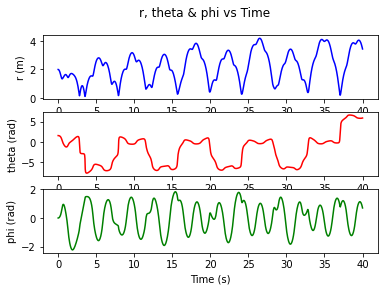

In [25]:
r = ans.T[0]
theta = ans.T[2]
phi = ans.T[4]

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('r, theta & phi vs Time')
ax1.plot(t, r, '-b')
ax2.plot(t, theta, '-r')
ax3.plot(t, phi, '-g')
ax1.set(xlabel='Time (s)', ylabel='r (m)')
ax2.set(xlabel='Time (s)', ylabel='theta (rad)')
ax3.set(xlabel='Time (s)', ylabel='phi (rad)')

In [26]:
def get_positions(t, r, theta, phi, L, D, L3):
    return (
        r*np.sin(theta),
        -r*np.cos(theta),
        -D+np.zeros(len(r)),
        -(L-D-r),
        r*np.sin(theta) + L3*np.sin(phi),
        -r*np.cos(theta) - L3*np.cos(phi)
    )

x1, z1, x2, z2, x3, z3 = get_positions(t, ans.T[0], ans.T[2], ans.T[4], L, D, L3)

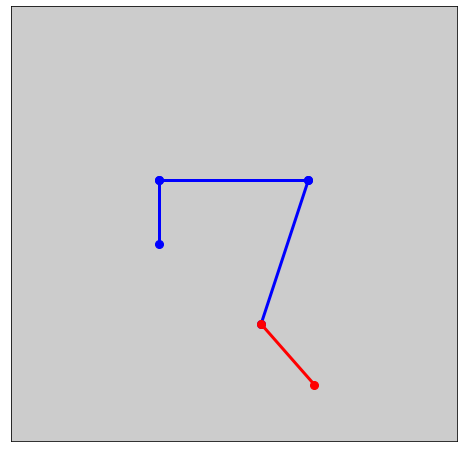

In [28]:
def animate(i):
    ln1.set_data([0, x1[i]], [0, z1[i]])
    ln2.set_data([0, -D], [0, 0])
    ln3.set_data([-D, x2[i]], [0, z2[i]])
    ln4.set_data([x1[i], x3[i]], [z1[i], z3[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('0.8')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'bo-', lw=3, markersize=8)
ln2, = plt.plot([], [], 'bo-', lw=3, markersize=8)
ln3, = plt.plot([], [], 'bo-', lw=3, markersize=8)
ln4, = plt.plot([], [], 'ro-', lw=3, markersize=8)
ax.set_ylim(-6,4)
ax.set_xlim(-8,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('sim3.gif',writer='pillow',fps=25)